<a href="https://colab.research.google.com/github/estebangaviria/Data-Science/blob/main/Limpieza%20de%20datos%20b%C3%A1sica%20y%20modelo%20de%20clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activad Unidad 2

### El data set con el que vamos a trabajar contiene datos de vinho verde tinto y blanco, del norte de Portugal. El objetivo es modelar el color del vino con base en las pruebas fisicoquímicas.

#### Información de atributos:
1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

12 - quality (score between 0 and 10)

## Carga de los datos


In [ ]:
# Carga de librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from matplotlib import style
from mlxtend.plotting import plot_decision_regions

In [ ]:
# Se cargan los datos
url_wine_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv" 
url_wine_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Data set vino tinto
data_red = pd.read_csv(url_wine_red, header=0, delimiter = ';', na_values=' ?')

# Data set vino Blanco
data_white = pd.read_csv(url_wine_white, header= 0, delimiter = ';',na_values = " ?" )


In [ ]:
# Tipo de vino Tinto
data_red["Class"] = "wine_red"
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,wine_red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,wine_red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,wine_red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,wine_red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,wine_red


In [ ]:
# Tipo de vino Blanco
data_white["Class"] = "wine_white"
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,wine_white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,wine_white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,wine_white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,wine_white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,wine_white


In [ ]:
# Se unen los datos en un solo data set
data = data_white.append(data_red, ignore_index=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,wine_white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,wine_white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,wine_white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,wine_white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,wine_white


# PRIMERA PARTE - CONOCIMIENTO DE LOS DATOS

### Identificar número de muestras y atributos

In [ ]:
# Numero de muestras y atributos
print("Dataset vino, número de muestras", data.shape[0], "número de atributos", data.shape[1])

Dataset vino, número de muestras 6497 número de atributos 13


### Identificar el tipo de cada atributo

In [ ]:
# Tipos de atributos data set
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Class                    object
dtype: object

### Medidas de centralidad y dispersión

Calcular medidas de centralidad y dispersión por cada atributo de acuerdo a su tipo (hacer gráfico de cajas y bigotes por atributo, diagrama de dispersión u otro diagrama acorde al tipo del atributo que ilustre el comportamiento de los datos)



In [ ]:
# Medidas de centralidad y dispersión
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


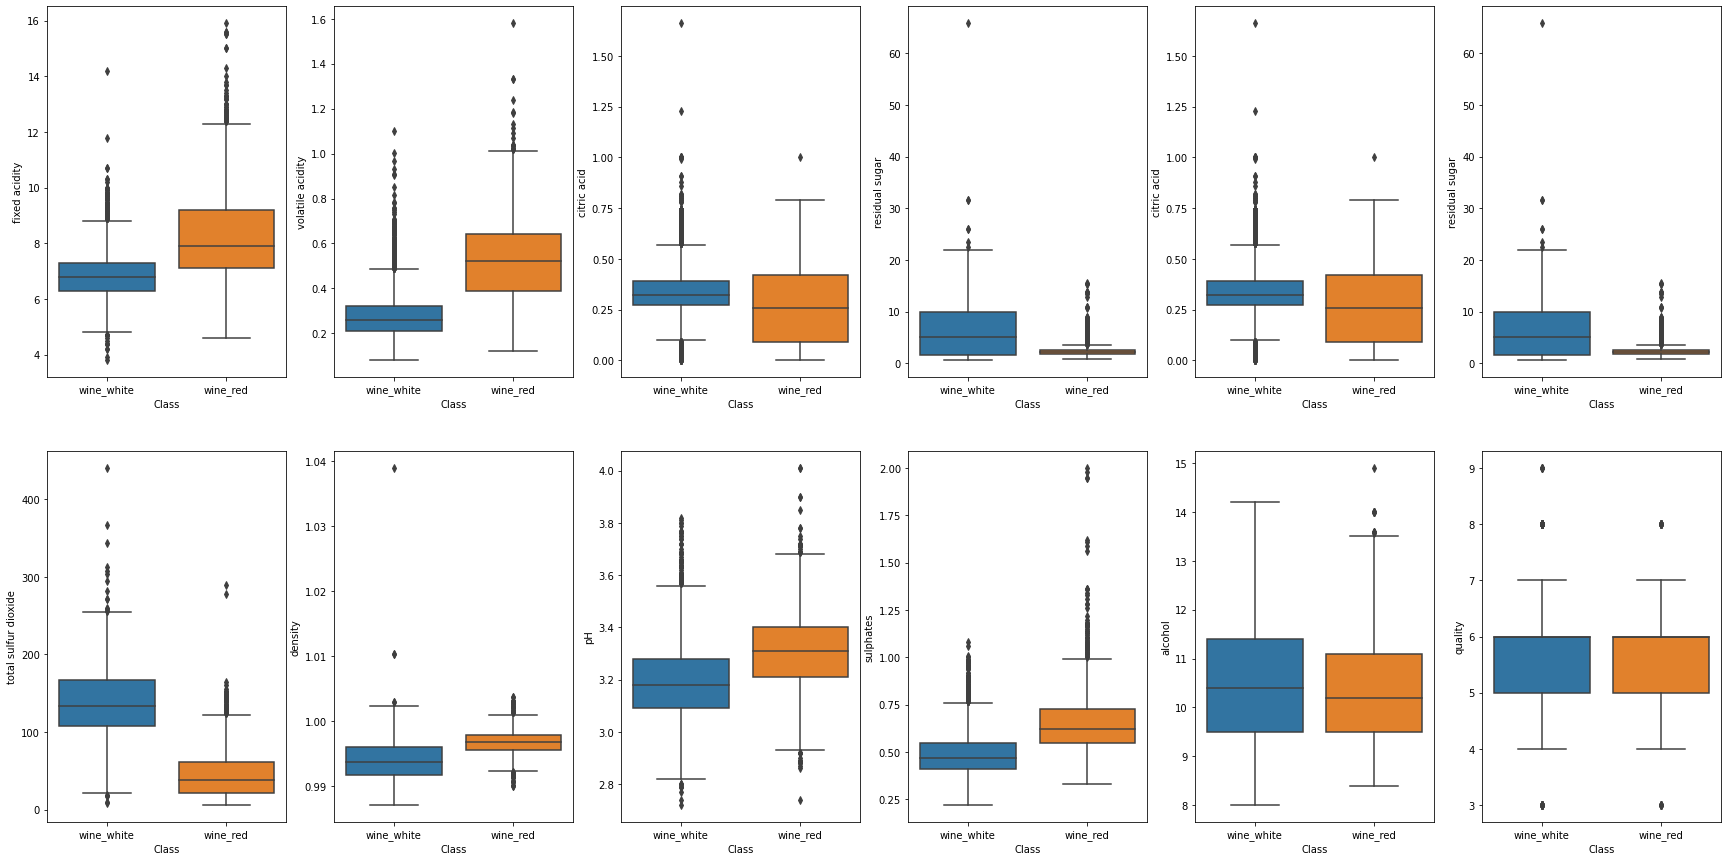

In [ ]:
# Gráficas de bigotes
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(30, 15))
sns.boxplot(x= "Class",y='fixed acidity', data=data ,ax=axs[0,0])
sns.boxplot(x= "Class",y='volatile acidity', data=data, ax=axs[0,1])
sns.boxplot(x= "Class",y='citric acid', data=data, ax=axs[0,2])
sns.boxplot(x= "Class",y='residual sugar', data=data, ax=axs[0,3])
sns.boxplot(x= "Class",y='citric acid', data=data, ax=axs[0,4])
sns.boxplot(x= "Class",y='residual sugar', data=data, ax=axs[0,5])
sns.boxplot(x= "Class",y='total sulfur dioxide', data=data, ax=axs[1,0])
sns.boxplot(x= "Class",y='density', data=data, ax=axs[1,1])
sns.boxplot(x= "Class",y='pH', data=data, ax=axs[1,2])
sns.boxplot(x= "Class",y='sulphates', data=data, ax=axs[1,3])
sns.boxplot(x= "Class",y='alcohol', data=data, ax=axs[1,4])
sns.boxplot(x= "Class",y='quality', data=data, ax=axs[1,5])


### Calcular la matriz de correlación entre los atributos de entrada

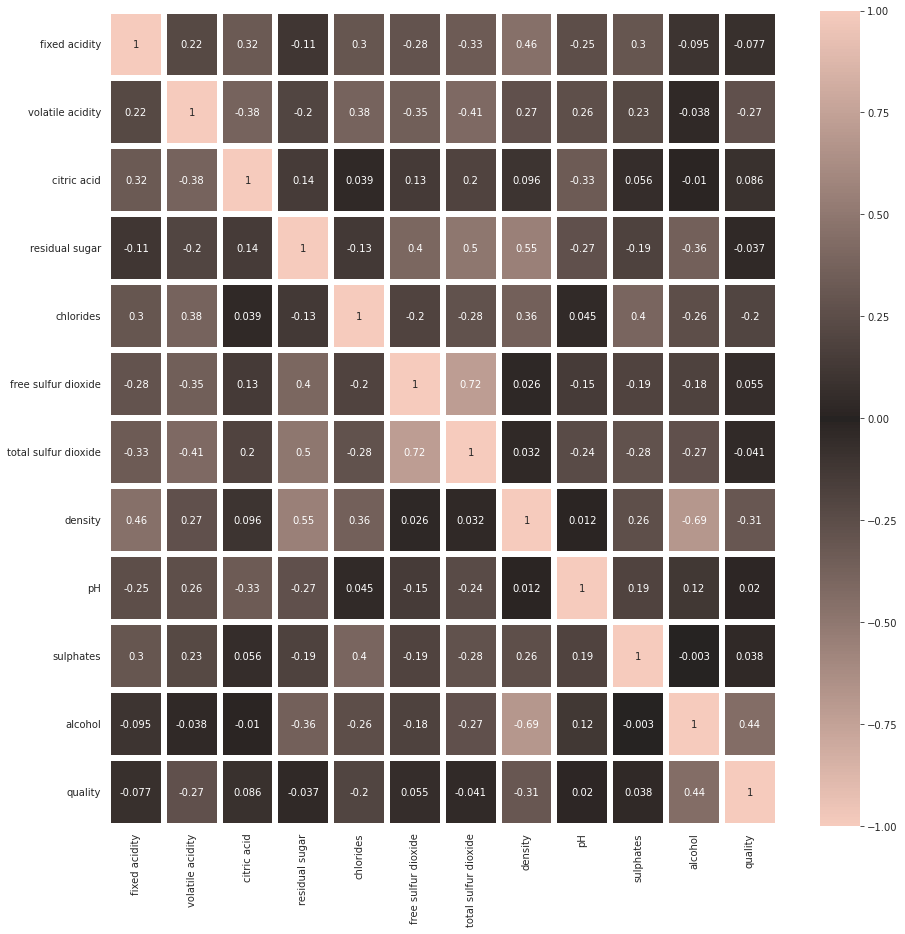

In [ ]:
# Matriz de correlación
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(data.corr(), annot=True, linewidths= 5, vmin=-1, vmax=1,cmap=sns.diverging_palette(30, 30, l=85, center="dark", as_cmap=True))

### Determinar el grado de balanceo entre los valores del atributo objetivo

In [ ]:
# Cuantos registros hay por cada valor del aributo objetivo "Class"  
print(data['Class'].value_counts())

wine_white    4898
wine_red      1599
Name: Class, dtype: int64


### Identificar número de datos faltantes por clase


In [ ]:
# Datos faltantes por cada atributo
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Class                   0
dtype: int64

### Identificar número de datos atípicos por clase

In [ ]:
# Utilizamos el for para iterar por todas los atributos y encontrar los outliers
# Creamos un dataset con los atributos cuantitativos
data1 = data.drop(['Class'],axis=1)
for column in data1:
    # Usamos el método quantile() para obtener los cuartiles 1 (25%) y 3 (75%)
    q1 = data1[column].quantile(0.25)
    q3 = data1[column].quantile(0.75)

    # Calculamos el rango intercuartil
    iqr = q3 - q1
    
    # Calculamos el valor de los bigotes inferior y superior
    lw = q1 - (1.5 * iqr)
    uw = q3 + (1.5 * iqr)

    # Validamos la condición lógica de valores menores que el limite inferior lw y mayores que el limite superior uw
    # y contamos la cantidad total por atributo
    print('Atributo: ', column, ", Cantidad de datos atípicos", data1.apply(lambda x: x[column] < lw or x[column] > uw, axis=1).sum())

Atributo:  fixed acidity , Cantidad de datos atípicos 357
Atributo:  volatile acidity , Cantidad de datos atípicos 377
Atributo:  citric acid , Cantidad de datos atípicos 509
Atributo:  residual sugar , Cantidad de datos atípicos 118
Atributo:  chlorides , Cantidad de datos atípicos 286
Atributo:  free sulfur dioxide , Cantidad de datos atípicos 62
Atributo:  total sulfur dioxide , Cantidad de datos atípicos 10
Atributo:  density , Cantidad de datos atípicos 3
Atributo:  pH , Cantidad de datos atípicos 73
Atributo:  sulphates , Cantidad de datos atípicos 191
Atributo:  alcohol , Cantidad de datos atípicos 3
Atributo:  quality , Cantidad de datos atípicos 228


# SEGUNDA PARTE - PREPARACIÓN DE LOS DATOS

### Resolver datos faltantes y realizar los ajustes necesarios al conjunto de datos

In [ ]:
# Datos faltantes por cada atributo
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Class                   0
dtype: int64

No hay datos faltantes en el dataset

### Resolver datos atípicos y realizar los ajustes necesarios al conjunto de datos

In [ ]:
# Utilizamos el for para iterar por todas los atributos y encontrar los outliers
data1 = data.drop(['Class'],axis=1)
for column in data1:
    # Usamos el método quantile() para obtener los cuartiles 1 (25%) y 3 (75%)
    q1 = data1[column].quantile(0.25)
    q3 = data1[column].quantile(0.75)

    # Calculamos el rango intercuartil
    iqr = q3 - q1
    
    # Calculamos el valor de los bigotes inferior y superior
    lw = q1 - (1.5 * iqr)
    uw = q3 + (1.5 * iqr)

    # Validamos la condición lógica de valores menores que el limite inferior lw y mayores que el limite superior uw
    outliers = (data1[column] < lw) | (data1[column] > uw)

    # Usamos la función loc para acceder a todos los registros que cumplan la condición especificada (outliers) y reemplazamos todos los 
    # valores de dichos registros para la columna elegida con el valor nulo.
    data1.loc[outliers, column] = np.nan

In [ ]:
# Verificamos que los valores de datos atípicos, ahora son valores nulos
data1.isnull().sum()

fixed acidity           357
volatile acidity        377
citric acid             509
residual sugar          118
chlorides               286
free sulfur dioxide      62
total sulfur dioxide     10
density                   3
pH                       73
sulphates               191
alcohol                   3
quality                 228
dtype: int64

In [ ]:
# La estrategia de imputación para las columnas es reemplazar los valores nulos por la media 
# ya que la desviacón estandar de los atributos no es muy alta
for column in data1:  
    # Obtenemos la columna, la guardamos en una variable y con el método dropna() quitamos los valores nulos
    columna = data1[column].dropna()

    # Usamos el método mean() para obtener el valor de la media y lo guardamos en una variable.
    media = columna.mean()

    # Con el método fillna() reemplazamos los valores nulos de una columna por un nuevo valor.
    data1.fillna(value={column: media}, inplace=True)


In [ ]:
# Actualizamos el dataset original sin los valores atípicos
data1 = pd.concat([data1,data['Class']],axis=1)
data1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.0,0.27,0.36,5.183116,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,wine_white
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,wine_white
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,wine_white
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,wine_white
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,wine_white


### Resolver datos correlacionados y realizar los ajustes necesarios al conjunto de datos

De acuerdo con la matriz de correlación mostrada anteriormente, no hay correlaciones fuertes entre los atributos, es decir, correlación mayor a 0.85 o menor a -0.85

### Resolver datos desbalanceados y realizar los ajustes necesarios al conjunto de datos

In [ ]:
from sklearn.preprocessing import LabelEncoder 

# Se convierten los atributos categóricos a valores numéricos, 1 -> wine_white, 0 -> wine_red
labelencoder= LabelEncoder() 
data1['Class'] = labelencoder.fit_transform(data1['Class'])
data1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.0,0.27,0.36,5.183116,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,1
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,1
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,1
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,1
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,1


In [ ]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?
# 1 -> wine_white, 0 -> wine_red
print(data1['Class'].value_counts())

1    4898
0    1599
Name: Class, dtype: int64


In [ ]:
# Se hace balanceo de clases eliminando ejemplos de la clase mayoritaria
g = data1.groupby('Class')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal

fixed acidity  volatile acidity  citric acid  residual sugar  \
Class                                                                      
0     0          6.100000              0.58     0.230000             2.5   
      1          7.002288              0.58     0.318146             2.5   
      2          8.300000              0.65     0.100000             2.9   
      3          7.002288              0.45     0.380000             2.5   
      4          7.002288              0.44     0.460000             2.2   
...                   ...               ...          ...             ...   
1     1594       6.700000              0.16     0.320000            12.5   
      1595       6.900000              0.39     0.400000             4.6   
      1596       6.800000              0.22     0.300000            10.6   
      1597       9.200000              0.25     0.340000             1.2   
      1598       6.900000              0.16     0.370000             1.8   

            chlorides  free sulfur dioxide  total sulfur dioxide  density  \
Class                                                                       
0     0         0.044                 16.0                  70.0  0.99352   
      1         0.072                  6.0                  37.0  0.99920   
      2         0.089                 17.0                  40.0  0.99803   
      3         0.081                 34.0                  66.0  0.99726   
      4         0.091                 10.0                  41.0  0.99638   
...               ...                  ...                   ...      ...   
1     1594      0.035                 18.0                 156.0  0.99666   
      1595      0.022                  5.0                  19.0  0.99150   
      1596      0.070                 67.0                 194.0  0.99654   
      1597      0.026                 31.0                  93.0  0.99160   
      1598      0.034                 36.0                  95.0  0.98952   

              pH  sulphates  alcohol   quality  Class  
Class                                                  
0     0     3.46       0.65     12.5  6.000000      0  
      1     3.05       0.56     10.0  5.000000      0  
      2     3.29       0.55      9.5  5.000000      0  
      3     3.15       0.58      9.8  5.000000      0  
      4     3.18       0.69     11.9  6.000000      0  
...          ...        ...      ...       ...    ...  
1     1594  2.88       0.36      9.0  6.000000      1  
      1595  3.31       0.37     12.6  5.762163      1  
      1596  2.89       0.42      9.0  6.000000      1  
      1597  2.93       0.37     11.3  7.000000      1  
      1598  2.93       0.59     12.0  6.000000      1  

[3198 rows x 13 columns]

In [ ]:
# Clases balanceadas
print(dataBal['Class'].value_counts())

0    1599
1    1599
Name: Class, dtype: int64


### Aplicar análisis de componentes principales al conjunto de datos

In [ ]:
# Se realiza la estandarización del data set
# es decir, escalar la distribución de valores para que la media de los valores observados sea 0 y la desviación estándar sea 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(dataBal.iloc[:,0:12]) # Se seleccionan todas las columnas del data Frame excepto Class

In [ ]:
# Calculo de PCA (Principal Component Analysis):
# El PCA (Principal Component Analysis) nos permite acelerar un algoritmo de aprendizaje automático
from sklearn.decomposition import PCA

# Se define el número 7 para los atributos del PCA
# Ya que el número 7 el número mínimo de atributos que explica la mayor varianza.
pca = PCA(n_components=7) # El numero de dimesiones a reducir 
pca.fit(scaled)

PCA(n_components=7)

In [ ]:
#Varianza explicada:

pca.explained_variance_ratio_

array([0.29157147, 0.18841073, 0.11864932, 0.08929689, 0.06579894,
       0.05386649, 0.05283064])

In [ ]:
# Suma de la varianza total explicada al dimensionar a 7 atributos
np.sum(pca.explained_variance_ratio_)

# Con 7 artibutos de 12, la varianza total explicada es del 89%

0.8604244760687941

In [ ]:
# Aplicamos el mapeo (transformar) al conjunto de datas estandarizados
Data_pca = pca.transform(scaled)

In [ ]:
# Adicionamos los datos transformados al dateset balanceado

dataBal1 = dataBal.copy()
dataBal1["PCA_1"]=Data_pca[:,0]
dataBal1["PCA_2"]=Data_pca[:,1]
dataBal1["PCA_3"]=Data_pca[:,2]
dataBal1["PCA_4"]=Data_pca[:,3]
dataBal1["PCA_5"]=Data_pca[:,4]
dataBal1["PCA_6"]=Data_pca[:,5]
dataBal1["PCA_7"]=Data_pca[:,6]

In [ ]:
# Mostramos el dataset balanceado con los 7 atributos transformados
dataBal1

fixed acidity  volatile acidity  citric acid  residual sugar  \
Class                                                                      
0     0          6.100000              0.58     0.230000             2.5   
      1          7.002288              0.58     0.318146             2.5   
      2          8.300000              0.65     0.100000             2.9   
      3          7.002288              0.45     0.380000             2.5   
      4          7.002288              0.44     0.460000             2.2   
...                   ...               ...          ...             ...   
1     1594       6.700000              0.16     0.320000            12.5   
      1595       6.900000              0.39     0.400000             4.6   
      1596       6.800000              0.22     0.300000            10.6   
      1597       9.200000              0.25     0.340000             1.2   
      1598       6.900000              0.16     0.370000             1.8   

            chlorides  free sulfur dioxide  total sulfur dioxide  density  \
Class                                                                       
0     0         0.044                 16.0                  70.0  0.99352   
      1         0.072                  6.0                  37.0  0.99920   
      2         0.089                 17.0                  40.0  0.99803   
      3         0.081                 34.0                  66.0  0.99726   
      4         0.091                 10.0                  41.0  0.99638   
...               ...                  ...                   ...      ...   
1     1594      0.035                 18.0                 156.0  0.99666   
      1595      0.022                  5.0                  19.0  0.99150   
      1596      0.070                 67.0                 194.0  0.99654   
      1597      0.026                 31.0                  93.0  0.99160   
      1598      0.034                 36.0                  95.0  0.98952   

              pH  sulphates  alcohol   quality  Class     PCA_1     PCA_2  \
Class                                                                       
0     0     3.46       0.65     12.5  6.000000      0 -0.822473  2.390824   
      1     3.05       0.56     10.0  5.000000      0 -2.084690 -0.961373   
      2     3.29       0.55      9.5  5.000000      0 -3.021871 -1.290755   
      3     3.15       0.58      9.8  5.000000      0 -1.011773 -1.100214   
      4     3.18       0.69     11.9  6.000000      0 -1.884710  0.924366   
...          ...        ...      ...       ...    ...       ...       ...   
1     1594  2.88       0.36      9.0  6.000000      1  2.830655 -1.965980   
      1595  3.31       0.37     12.6  5.762163      1  0.641742  2.578057   
      1596  2.89       0.42      9.0  6.000000      1  3.093378 -2.809245   
      1597  2.93       0.37     11.3  7.000000      1  1.906581  1.323105   
      1598  2.93       0.59     12.0  6.000000      1  2.272836  1.967818   

               PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  
Class                                                         
0     0     1.322799  1.100883 -0.521381  0.246709  1.225810  
      1    -0.093899 -1.036665 -0.585676  1.288704  1.240690  
      2     1.368503 -0.669111 -1.348689 -0.724965  0.372153  
      3    -0.128853 -0.235644  0.544376  0.121692  1.077514  
      4    -1.514376  0.454280  0.142580  0.740416  0.982805  
...              ...       ...       ...       ...       ...  
1     1594 -0.716876 -1.020922 -1.134120  1.820935 -1.013096  
      1595 -0.048453 -1.374007 -0.149576  1.288054  0.174372  
      1596 -0.385760  0.221437 -0.884686 -0.312690  0.115745  
      1597 -2.120520 -2.220846 -1.519933 -1.380993 -0.559332  
      1598 -1.259529 -1.024036  0.078194 -0.357077  0.539783  

[3198 rows x 20 columns]

In [ ]:
# Datos transformados
dataBal_pca = dataBal1.iloc[:,12:20]


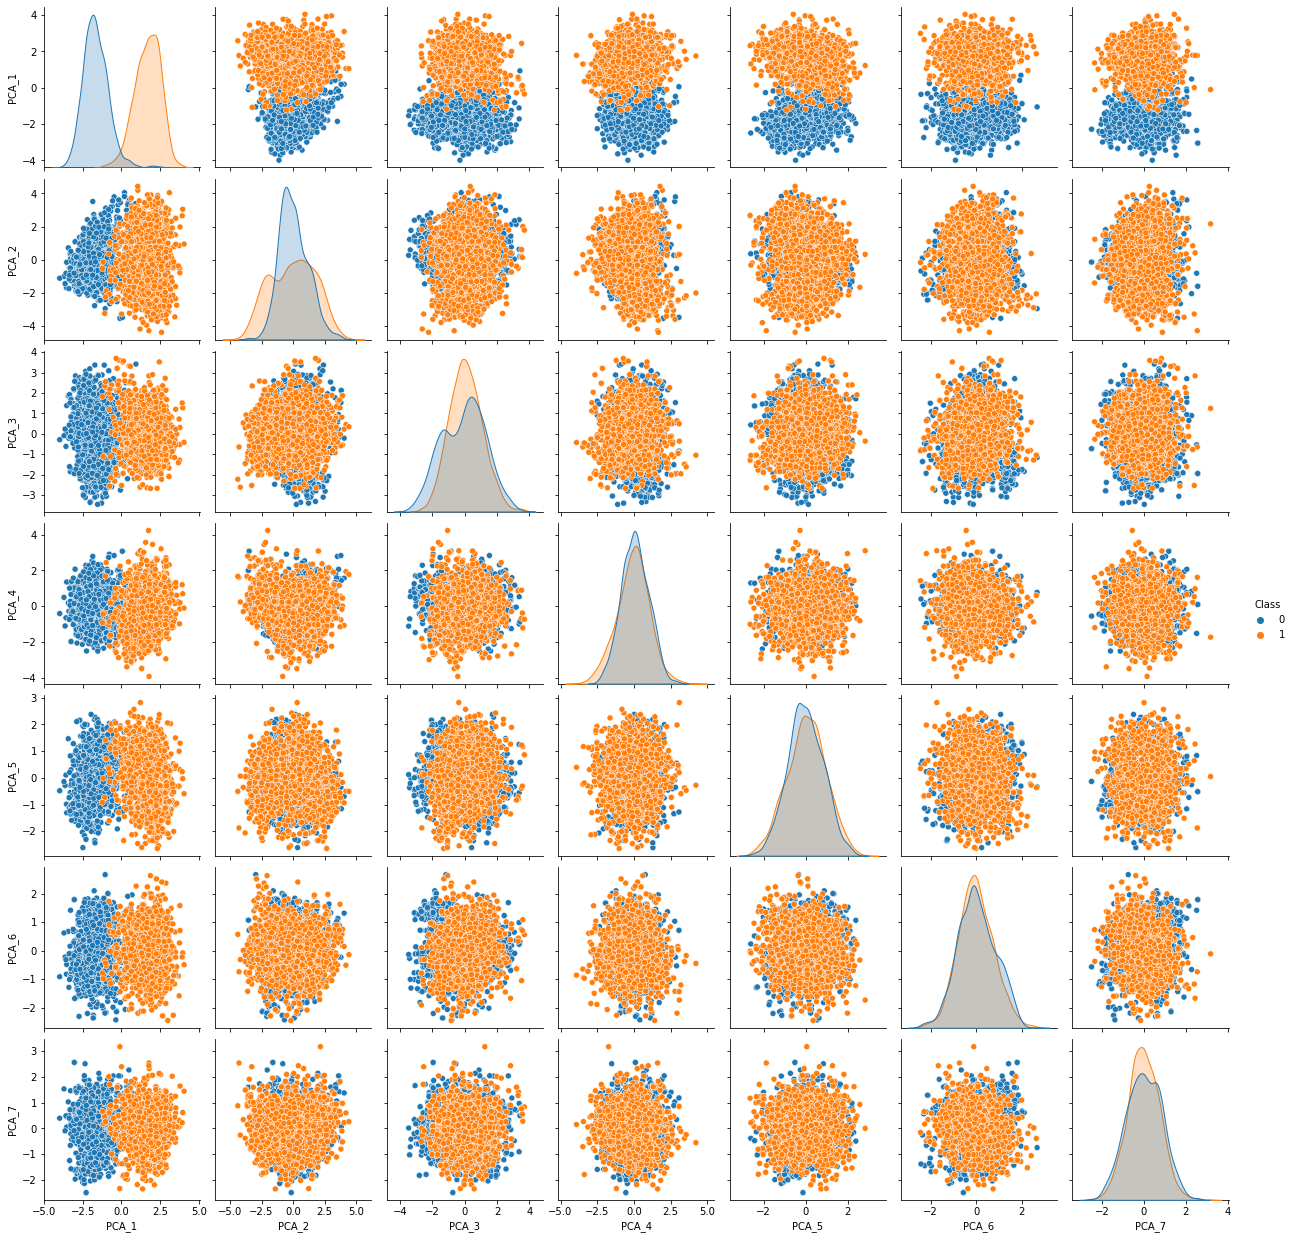

In [ ]:
# Graficamos los datos transformados con el atributo de salida "Class"
sns.pairplot(data=dataBal_pca, hue="Class")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


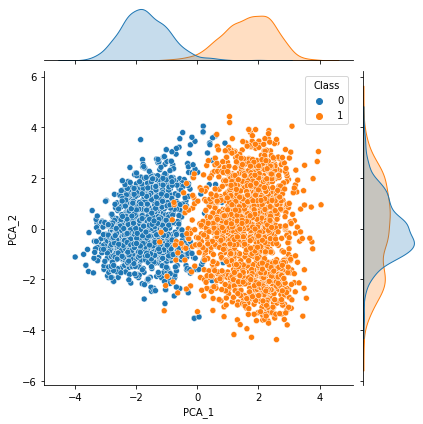

In [ ]:
sns.jointplot(dataBal_pca['PCA_1'], dataBal_pca['PCA_2'], hue=dataBal_pca["Class"])

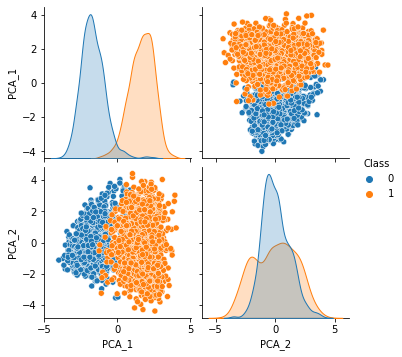

In [ ]:
sns.pairplot(data=dataBal_pca.iloc[:,0:3], hue="Class")

### Creación del modelo

### Modelo de clasificación Support Vector Machine 

In [ ]:
# Se divide el conjunto de datos en conjuntos de entrenamiento 70% y test 30%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataBal_pca.drop('Class', axis=1), dataBal_pca.Class, test_size=0.30)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(2238, 7) (2238,)
(960, 7) (960,)


In [ ]:
# Creación t entrenamiendo del modelo SVM (Support Vector Machine) lineal
from sklearn.svm import SVC
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=123)

In [ ]:
# Predicciones test
predicciones = modelo.predict(X_test)
predicciones

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [ ]:
# Accuracy de test del modelo 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {round(100*accuracy,2)}%")


El accuracy de test es: 97.08%


### Modelo de clasificación por regresión logística

In [ ]:
# Creación y entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=1000, tol=0.01)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, tol=0.01)

In [ ]:
# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [ ]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("")
print(f"El accuracy de test es: {round(100*accuracy,2)}%")


El accuracy de test es: 97.19%


### Bitacora

#### Conjunto original (sin realizarle ningún cambio)

In [ ]:
# Se divide el conjunto de datos en conjuntos de entrenamiento 70% y test 30% -CONJUNTO DE DATOS SIN MODIFICAR

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data.Class, test_size=0.30)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(4547, 12) (4547,)
(1950, 12) (1950,)


In [ ]:
# Creación y entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=1000 ,tol=0.01)
logisticRegr.fit(X_train, y_train)

# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("")
print(f"El accuracy de test es: {round(100*accuracy,2)}%")


El accuracy de test es: 98.26%


#### Conjunto sin datos faltantes

Como no se tiene datos faltantes, no se realiza este punto.

#### Conjunto sin datos faltantes ni atípicos



In [ ]:
# Se divide el conjunto de datos en conjuntos de entrenamiento 70% y test 30% -CONJUNTO DE DATOS SIN MODIFICAR

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data1.drop('Class', axis=1), data1.Class, test_size=0.30)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(4547, 12) (4547,)
(1950, 12) (1950,)


In [ ]:
# Creación y entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=1000, tol=0.01)
logisticRegr.fit(X_train, y_train)

# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("")
print(f"El accuracy de test es: {round(100*accuracy,2)}%")


El accuracy de test es: 97.08%


#### Conjunto sin datos faltantes ni atípicos ni correlacionados



#### Conjunto sin datos faltantes

Como no se tiene datos correlacionados, no se realiza este punto.

#### Conjunto balanceado y sin datos faltantes, ni atípicos, ni correlacionados

In [ ]:
# Se divide el conjunto de datos en conjuntos de entrenamiento 70% y test 30% -CONJUNTO DE DATOS BALANCEADOS

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataBal.drop('Class', axis=1), dataBal.Class, test_size=0.30)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(2238, 12) (2238,)
(960, 12) (960,)


In [ ]:
# Creación y entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=2000, tol=0.01)
logisticRegr.fit(X_train, y_train)

# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("")
print(f"El accuracy de test es: {round(100*accuracy,2)}%")


El accuracy de test es: 95.94%


In [ ]:
# @title Reporte de Resultados
%%html
 <table>
  <tr>
    <th>VARIANTES DEL CONJUNTO DE DATOS</th>
    <th>ACCURACY</th>
  </tr>
  <tr>
    <td>1. Conjunto original (sin realizarle ningún cambio)</td>
    <td>98.26%</td>
  </tr>
  <tr>
    <td>2. Conjunto sin datos faltantes</td>
    <td>No Aplica. No hay faltantes.</td>
  </tr>
  <tr>
    <td>3. Conjunto sin datos faltantes, ni atípicos.</td>
    <td>97.08%</td>
  </tr>
  <tr>
    <td>4. Conjunto sin datos faltantes, ni atípicos, ni correlacionados</td>
    <td>No aplica. No hay correlacionados.</td>
  </tr>
  <tr>
    <td>5. Conjunto balanceado y sin datos faltantes, ni atípicos, ni correlacionados</td>
    <td>95.94%</td>
  </tr>
  <tr>
    <td>6. Conjunto obtenido del PCA</td>
    <td>97.19%</td>
  </tr>
</table> 

VARIANTES DEL CONJUNTO DE DATOS,ACCURACY
1. Conjunto original (sin realizarle ningún cambio),98.26%
2. Conjunto sin datos faltantes,No Aplica. No hay faltantes.
"3. Conjunto sin datos faltantes, ni atípicos.",97.08%
"4. Conjunto sin datos faltantes, ni atípicos, ni correlacionados",No aplica. No hay correlacionados.
"5. Conjunto balanceado y sin datos faltantes, ni atípicos, ni correlacionados",95.94%
6. Conjunto obtenido del PCA,97.19%


Con respecto a los resultados obtenidos del nivel de accuracy con los diferentes conjuntos de datos, logramos concluir que:
1.	El mayor accuracy se da con el conjunto original.
2.	En todos los conjuntos de datos excepto en el obtenido con el conjunto del PCA. Se logro ver que con 500 iteraciones se alcanzó el límite. Por tanto, el modelo de regresión logística utilizando el conjunto de datos obtenidos del PCA es más eficiente.


### ¿Qué versión del conjunto de datos obtiene mejores resultados en el entrenamiento?
El modelo con los datos originales tuvo un mayor porcentaje.

Se llego a la conclusión de que a pesar de que el accuracy para el conjunto de datos obtenidos del PCA (97.19%) no es el mayor, si puede ser el mas eficiente y mas confiable; dado todo el tratamiento de datos que tiene, incluyendo: 

•	Resolución de datos atípicos.

•	Balanceo de datos.

•	Reducción de dimensionalidad con PCA.
